In [ ]:
import random
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# make pairs
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

pairs_train, labels_train = make_pairs(x_train, y_train)
pairs_test, labels_test = make_pairs(x_test, y_test)

In [ ]:
pairs_train.shape

(120000, 2, 28, 28)

In [ ]:
labels_train.shape

(120000,)

In [ ]:
labels_train

array([1, 0, 1, ..., 0, 1, 0])

1


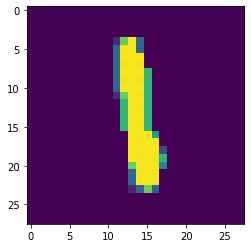

In [ ]:
# take a peek at the data
plt.imshow(pairs_train[400,0])
print(labels_train[400])

In [ ]:
from keras import backend as K

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Lambda(euclidean_distance)([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
7500/7500 [==============================] - 17s 2ms/step - loss: 0.4922 - accuracy: 0.7487
Epoch 2/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.3117 - accuracy: 0.8758
Epoch 3/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2620 - accuracy: 0.8964
Epoch 4/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2499 - accuracy: 0.8995
Epoch 5/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2416 - accuracy: 0.9052
Epoch 6/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2351 - accuracy: 0.9062
Epoch 7/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2324 - accuracy: 0.9069
Epoch 8/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2287 - accuracy: 0.9094
Epoch 9/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2300 - accuracy: 0.9087
Epoch 10/10
7500/7500 [==============================] - 14s 2ms/step - l

source:
    https://raw.githubusercontent.com/lukas/ml-class/master/videos/one-shot/